## feature extractions
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction

In [2]:
#1. One-hot encoding
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
features = [ {'city': 'Dubai', 'temperature': 33.}, 
        {'city': 'London', 'temperature': 12.}, 
        {'city': 'San Francisco', 'temperature': 18.}]

In [3]:
X =  vec.fit_transform(features).toarray()
X

array([[ 1.,  0.,  0., 33.],
       [ 0.,  1.,  0., 12.],
       [ 0.,  0.,  1., 18.]])

In [4]:
print(vec.get_feature_names())

['city=Dubai', 'city=London', 'city=San Francisco', 'temperature']


In [5]:
#try: one-hot encode HW2's dataset
import pandas as pd
df = pd.read_csv('./train.csv')
X = df.to_dict('record')
vec.fit_transform(X).toarray()
vec.get_feature_names()

['AVERAGE_CALL_DURATION',
 'COLLEGE=one',
 'COLLEGE=zero',
 'CONSIDERING_CHANGE_OF_PLAN=actively_looking_into_it',
 'CONSIDERING_CHANGE_OF_PLAN=considering',
 'CONSIDERING_CHANGE_OF_PLAN=never_thought',
 'CONSIDERING_CHANGE_OF_PLAN=no',
 'CONSIDERING_CHANGE_OF_PLAN=perhaps',
 'HANDSET_PRICE',
 'HOUSE',
 'INCOME',
 'LEAVE',
 'LEFTOVER',
 'OVERAGE',
 'OVER_15MINS_CALLS_PER_MONTH',
 'REPORTED_SATISFACTION=avg',
 'REPORTED_SATISFACTION=sat',
 'REPORTED_SATISFACTION=unsat',
 'REPORTED_SATISFACTION=very_sat',
 'REPORTED_SATISFACTION=very_unsat',
 'REPORTED_USAGE_LEVEL=avg',
 'REPORTED_USAGE_LEVEL=high',
 'REPORTED_USAGE_LEVEL=little',
 'REPORTED_USAGE_LEVEL=very_high',
 'REPORTED_USAGE_LEVEL=very_little']

In [6]:
# bag-of-words
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['This is the first document.',
'This document is the second document.',
'And this is the third one.',
'Is this the first document?']
vec = CountVectorizer()
X = vec.fit_transform(corpus)
X.toarray()
print(X)
vec.get_feature_names()

  (0, 1)	1
  (0, 2)	1
  (0, 6)	1
  (0, 3)	1
  (0, 8)	1
  (1, 5)	1
  (1, 1)	2
  (1, 6)	1
  (1, 3)	1
  (1, 8)	1
  (2, 4)	1
  (2, 7)	1
  (2, 0)	1
  (2, 6)	1
  (2, 3)	1
  (2, 8)	1
  (3, 1)	1
  (3, 2)	1
  (3, 6)	1
  (3, 3)	1
  (3, 8)	1


['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

In [7]:
twogram_vec = CountVectorizer(ngram_range=(2, 3))
X = twogram_vec.fit_transform(corpus)
X.toarray()
print(X)

  (0, 13)	1
  (0, 6)	1
  (0, 22)	1
  (0, 4)	1
  (0, 12)	1
  (0, 5)	1
  (0, 21)	1
  (1, 15)	1
  (1, 7)	1
  (1, 3)	1
  (1, 20)	1
  (1, 11)	1
  (1, 14)	1
  (1, 2)	1
  (1, 19)	1
  (1, 5)	1
  (2, 17)	1
  (2, 8)	1
  (2, 1)	1
  (2, 18)	1
  (2, 16)	1
  (2, 0)	1
  (2, 22)	1
  (2, 5)	1
  (2, 21)	1
  (3, 24)	1
  (3, 10)	1
  (3, 23)	1
  (3, 9)	1
  (3, 13)	1
  (3, 4)	1
  (3, 12)	1


In [8]:
twogram_vec.get_feature_names()

['and this',
 'and this is',
 'document is',
 'document is the',
 'first document',
 'is the',
 'is the first',
 'is the second',
 'is the third',
 'is this',
 'is this the',
 'second document',
 'the first',
 'the first document',
 'the second',
 'the second document',
 'the third',
 'the third one',
 'third one',
 'this document',
 'this document is',
 'this is',
 'this is the',
 'this the',
 'this the first']

In [ ]:
#tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer()
X_tfidf = tfidf_vec.fit_transform(corpus)
X_tfidf.toarray()

In [ ]:
vec.get_feature_names()

In [ ]:
vec.vocabulary_.get('second')

In [ ]:
vec.transform(['Something completely new document.']).toarray()
print(vec.transform(['Something completely and.']).toarray())

## feature selections
https://scikit-learn.org/stable/modules/feature_selection.html

#### L1 regularization gives sparse solutions

Automatically created module for IPython interactive environment
Computing regularization path using the LARS ...
.

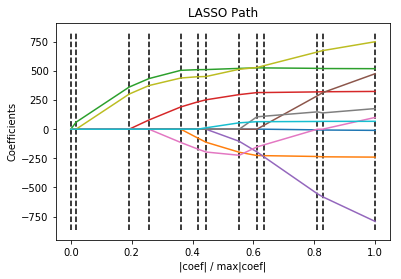

In [10]:
print(__doc__)

# Author: Fabian Pedregosa <fabian.pedregosa@inria.fr>
#         Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

print("Computing regularization path using the LARS ...")
_, _, coefs = linear_model.lars_path(X, y, method='lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()

#### tree based feature selections
The relative rank (i.e. depth) of a feature used as a decision node in a tree can be used to assess the relative importance of that feature with respect to the predictability of the target variable. Features used at the top of the tree contribute to the final prediction decision of a larger fraction of the input samples. The expected fraction of the samples they contribute to can thus be used as an estimate of the relative importance of the features. In scikit-learn, the fraction of samples a feature contributes to is combined with the decrease in impurity from splitting them to create a normalized estimate of the predictive power of that feature.

By averaging the estimates of predictive ability over several randomized trees one can reduce the variance of such an estimate and use it for feature selection. This is known as the mean decrease in impurity, or MDI. Refer to [L2014] for more information on MDI and feature importance evaluation with Random Forests. (https://scikit-learn.org/stable/modules/ensemble.html#feature-importance-evaluation)

Automatically created module for IPython interactive environment
downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\1700xWin10\scikit_learn_data
Fitting ExtraTreesClassifier on faces data with 1 cores...
done in 0.885s


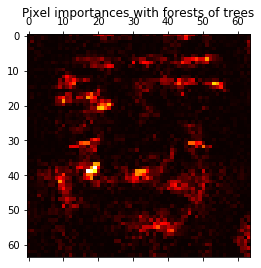

In [11]:
print(__doc__)
%matplotlib inline
from time import time
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import ExtraTreesClassifier

# Number of cores to use to perform parallel fitting of the forest model
n_jobs = 1

# Load the faces dataset
data = fetch_olivetti_faces()
X = data.images.reshape((len(data.images), -1))
y = data.target

mask = y < 5  # Limit to 5 classes
X = X[mask]
y = y[mask]

# Build a forest and compute the pixel importances
print("Fitting ExtraTreesClassifier on faces data with %d cores..." % n_jobs)
t0 = time()
forest = ExtraTreesClassifier(n_estimators=1000,
                              max_features=128,
                              n_jobs=n_jobs,
                              random_state=0)

forest.fit(X, y)
print("done in %0.3fs" % (time() - t0))
importances = forest.feature_importances_
importances = importances.reshape(data.images[0].shape)

# Plot pixel importances
plt.matshow(importances, cmap=plt.cm.hot)
plt.title("Pixel importances with forests of trees")
plt.show()

suggested reading: https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html <br>
References: From the official documentations of scikit learn